In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
from PIL import Image
import random
import numpy as np


In [20]:

# Data Preparation
image_size = (224, 224)
batch_size = 32


In [21]:

# Define the path to the 'Go_Straight' directory
go_straight_dir = 'C:/Users/hp/Downloads/object detection project/dataset/train/Go_Straight'


In [22]:

def plot_single_image(image_path):
    # Open the image
    image = Image.open(image_path)

    # Display the image
    plt.imshow(image)
    plt.axis('off')
    plt.show()

Random Image from 'Go_Straight' Directory:


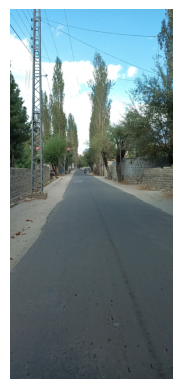

In [23]:
# Get a list of image files in the 'Go_Straight' directory
image_files = [f for f in os.listdir(go_straight_dir) if os.path.isfile(os.path.join(go_straight_dir, f))]

# Select a random image file
random_image_file = image_files[0]

# Create the full path to the random image
random_image_path = os.path.join(go_straight_dir, random_image_file)

# Plot the selected image
print(f"Random Image from 'Go_Straight' Directory:")
plot_single_image(random_image_path)


In [24]:
# Split the dataset into training, validation, and test sets
train_dir = 'C:/Users/hp/Downloads/object detection project/dataset/train'
test_dir = 'C:/Users/hp/Downloads/object detection project/dataset/test'

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.15  # Allocate 15% of the data for validation
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 164 images belonging to 4 classes.
Found 28 images belonging to 4 classes.
Found 64 images belonging to 4 classes.


In [25]:
# Model Building
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # 4 output classes
])

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the summary of the new model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 128)      

In [26]:
# Training
epochs = 15
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    verbose=1
)

Epoch 1/15
6/6 [==============================] - 23s 4s/step - loss: 3.3551 - accuracy: 0.3110 - val_loss: 1.3729 - val_accuracy: 0.2500
Epoch 2/15
6/6 [==============================] - 20s 3s/step - loss: 1.4016 - accuracy: 0.2927 - val_loss: 1.3554 - val_accuracy: 0.2500
Epoch 3/15
6/6 [==============================] - 20s 3s/step - loss: 1.4575 - accuracy: 0.2866 - val_loss: 1.4012 - val_accuracy: 0.3571
Epoch 4/15
6/6 [==============================] - 19s 4s/step - loss: 1.3787 - accuracy: 0.3171 - val_loss: 1.3499 - val_accuracy: 0.2500
Epoch 5/15
6/6 [==============================] - 20s 3s/step - loss: 1.3295 - accuracy: 0.3902 - val_loss: 1.2664 - val_accuracy: 0.4643
Epoch 6/15
6/6 [==============================] - 19s 3s/step - loss: 1.3384 - accuracy: 0.3720 - val_loss: 1.2764 - val_accuracy: 0.2500
Epoch 7/15
6/6 [==============================] - 20s 3s/step - loss: 1.3544 - accuracy: 0.3841 - val_loss: 1.1949 - val_accuracy: 0.2857
Epoch 8/15
6/6 [==================

In [27]:
# Evaluation
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f'Test accuracy: {test_acc}')

# Save the model
model.save('my_updated_model.h5')


2/2 - 4s - loss: 1.0703 - accuracy: 0.5625 - 4s/epoch - 2s/step
Test accuracy: 0.5625


In [28]:

# Load the trained model
model = tf.keras.models.load_model('my_updated_model.h5')


In [29]:

# Define the test directory
test_dir = 'C:/Users/hp/Downloads/object detection project/dataset/test'


1/1 [==============================] - 0s 47ms/step


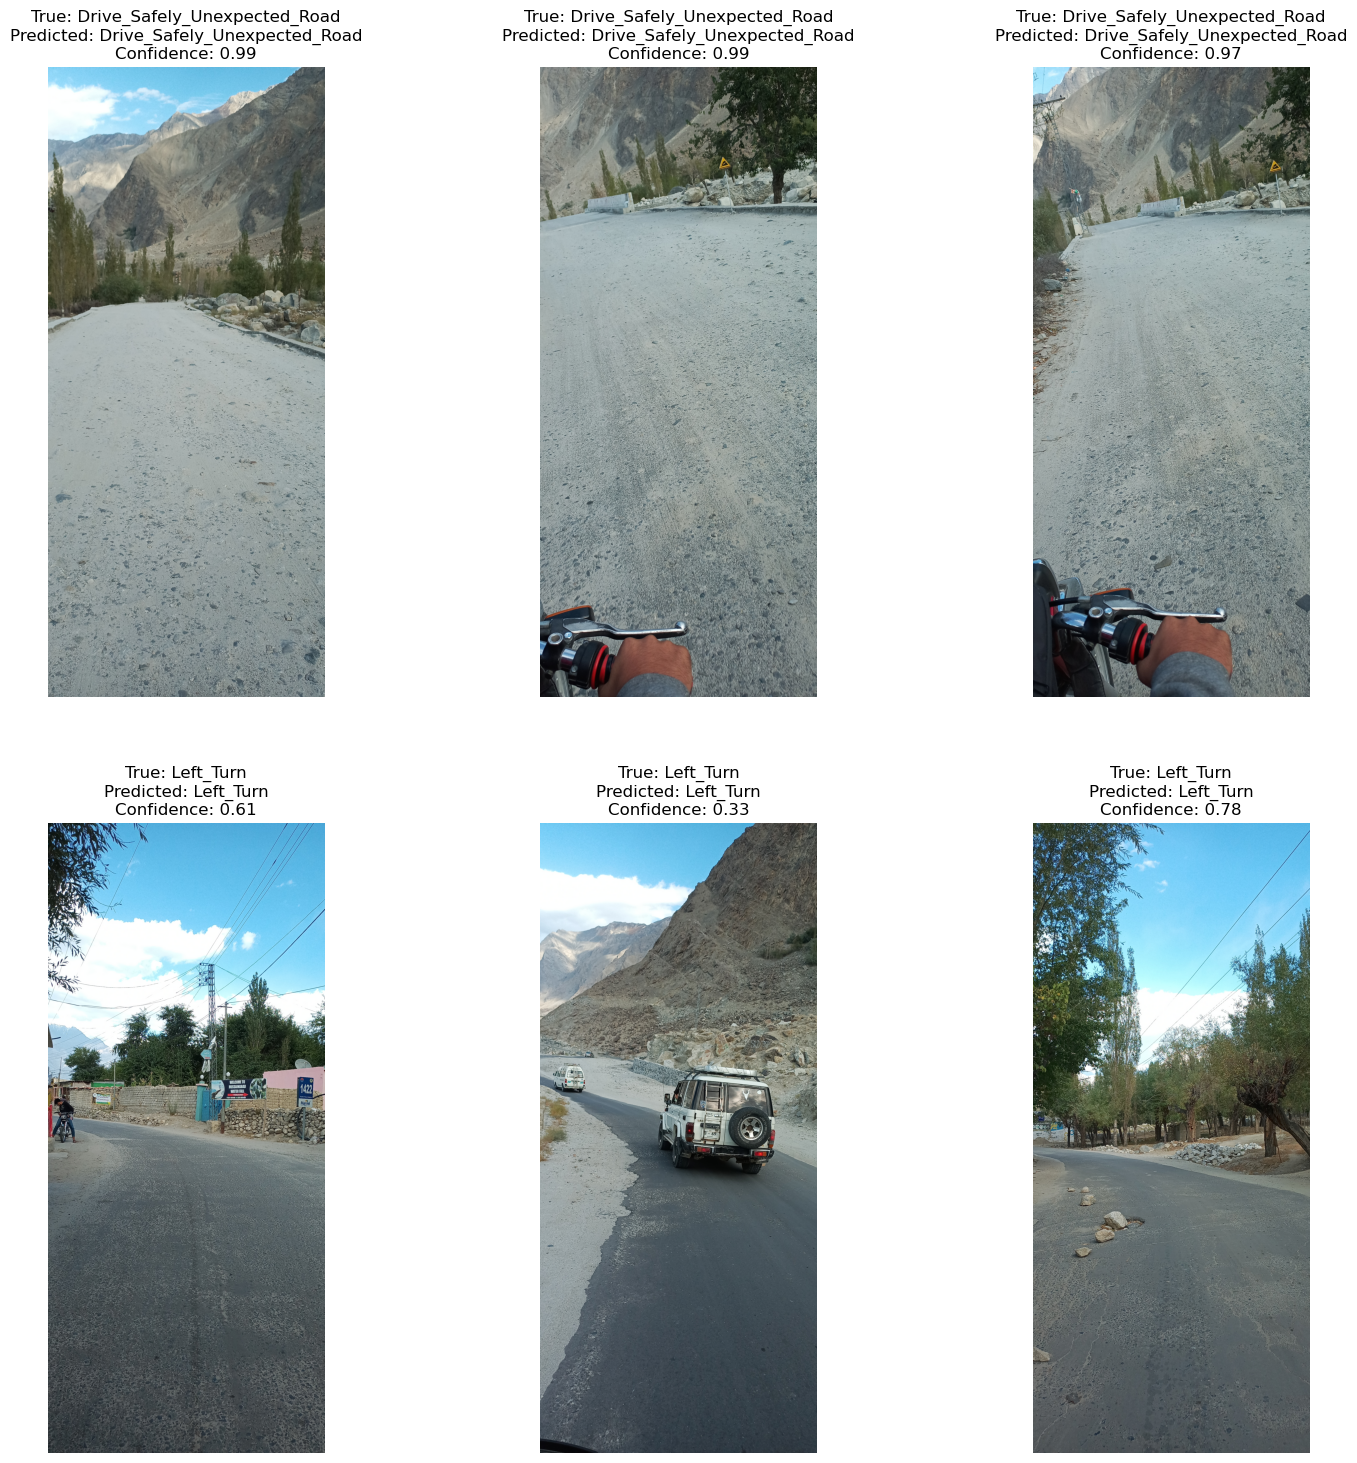

In [40]:
# Define the original classes
classes = ['Drive_Safely_Unexpected_Road', 'Left_Turn']

def load_and_predict(model, image_path):
    # Load and preprocess the image
    img = Image.open(image_path)
    img = img.resize((224, 224))  # Resize the image to match the model's expected sizing
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the image

    # Make a prediction
    predictions = model.predict(img_array)

    # Get the predicted class
    predicted_class_index = np.argmax(predictions)
    predicted_class = classes[predicted_class_index]

    return predicted_class, predictions, predicted_class_index

def plot_images_with_predictions(directory, num_images=2):
    fig, axes = plt.subplots(len(classes), num_images, figsize=(18, 18))

    for i, class_name in enumerate(classes):
        class_dir = os.path.join(directory, class_name)

        # Get a list of random image filenames
        image_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
        random_images = random.sample(image_files, min(num_images, len(image_files)))

        for j, image_name in enumerate(random_images):
            image_path = os.path.join(class_dir, image_name)

            # Load and predict
            predicted_class, predictions, predicted_class_index = load_and_predict(model, image_path)

            # Display the image
            img = Image.open(image_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            axes[i, j].set_title(f"True: {class_name}\nPredicted: {predicted_class}\nConfidence: {predictions[0][predicted_class_index]:.2f}")

    plt.show()

# Plot two random images with predictions for each class
plot_images_with_predictions(test_dir, num_images=3)
